# Классификация изображений

### Задания для выполнения
1) Загрузите датасет Olivetti faces;

2) Познакомьтесь с описанием и структурой датасета. Описание можно найти в документации.

3) Выведите информацию о количественных параметрах датасета;

4) Выведите несколько изображений на экран используя инструментарий библиотеки matplotlib;

5) Разделите эти данные на тестовую и обучающую выборки;

6) Постройте модель классификатора метода опорных векторов для идентификации человека по изображению;

7) Оцените качество модели на тестовой выборке с помощью следующих метрик:

    - достоверность предсказания (accuracy);
    - точность (precision);
    - полнота (recall);
    
8) Постройте кривую обучения - график зависимости тестовой и обучающей эффективности от размера обучающей выборки.

9) Сделайте вывод о применимости модели.

#### Импортируем необходимые библиотеки

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import svm
from sklearn import metrics
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()
# print(faces.DESCR)

#### Посмотрим на имеющиеся изображения

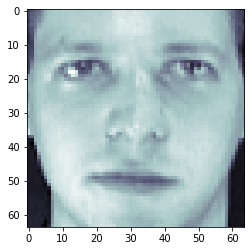

In [3]:
plt.imshow(faces.images[0], cmap=plt.cm.bone)

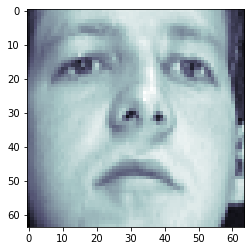

In [4]:
plt.imshow(faces.images[8], cmap=plt.cm.bone)

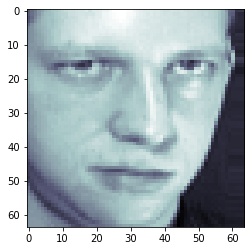

In [5]:
plt.imshow(faces.images[9], cmap=plt.cm.bone)

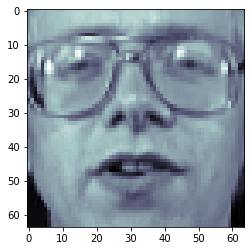

In [6]:
plt.imshow(faces.images[10], cmap=plt.cm.bone)

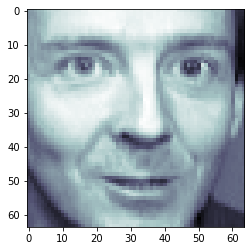

In [7]:
plt.imshow(faces.images[29], cmap=plt.cm.bone)

#### Разделим данные на тестовую и обучающую выборку

Выделим целевую переменную и факторы:

In [11]:
X = faces.data
Y = faces.target

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=True)

#### Постройте модель классификатора метода опорных векторов для идентификации человека по изображению

In [13]:
cls = svm.SVC()
cls.fit(x_train, y_train)
y_pred = cls.predict(x_test)

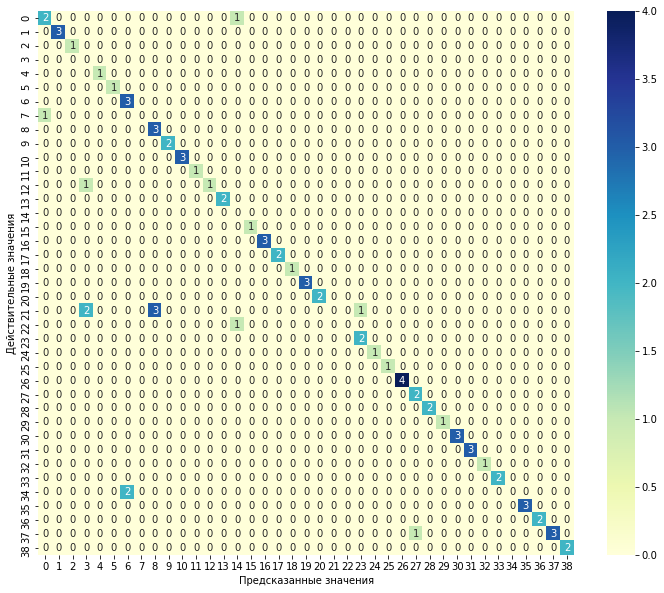

In [14]:
class_names = [i for i in range(40)]
fig, ax = plt.subplots(figsize=(12,10))
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
 
sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_pred)),
    annot=True,
    cmap="YlGnBu")
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')
 
plt.show()

#### Оцените качество модели на тестовой выборке с помощью следующих метрик:

- достоверность предсказания (accuracy);
- точность (precision);
- полнота (recall);

In [15]:
print('Метрика достоверности предсказания:', metrics.accuracy_score(y_test, y_pred))
print('Метрика точности:', metrics.precision_score(y_test, y_pred, average = 'micro'))
print('Метрика полноты:', metrics.recall_score(y_test, y_pred, average = 'micro'))
# print(classification_report(y_test, y_pred))

Метрика достоверности предсказания: 0.8375
Метрика точности: 0.8375
Метрика полноты: 0.8375


#### Постройте кривую обучения - график зависимости тестовой и обучающей эффективности от размера обучающей выборки.

C:\Users\sanha\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


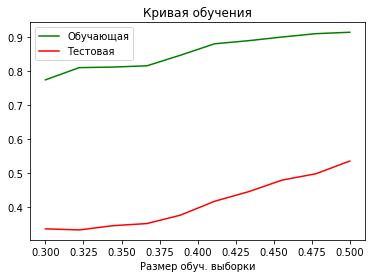

In [16]:
size = np.linspace(0.3,0.5,10)
train_size, train_scores, validation_scores = learning_curve(cls, x_train, y_train, train_sizes = size)
train_scores = train_scores.mean(axis = 1)
validation_scores = validation_scores.mean(axis = 1)
plt.figure()
plt.plot(size, train_scores, color = 'green',  label='Обучающая')
plt.plot(size, validation_scores, color = 'red', label='Тестовая')
plt.title('Кривая обучения')
plt.xlabel('Размер обуч. выборки')
plt.legend()
plt.show()

### Дополнительные задания
1) Постройте модели классификации на основе следующих методов:

    - метод опорных векторов с гауссовым ядром (SVC);
    - метод опорных векторов с полиномиальным ядром (SVC);
    - метод k ближайших соседей (KNeighborsClassifier);
    - многослойный перцептрон (MLP);
    
2) Проанализируйте метрики каждой модели и сделайте выводы об их эффективности и применимости. Сравните эффективность всех этих моделей и выберите лучшую;

3) Для каждой модели из п.3 постройте кривые обучения и диагностируйте недо-/переобучение модели. Попробуйте изменить параметр регуляризации для улучшения результатов модели.

4) Сделайте замеры времени обучения для каждой модели. Сделайте вывод о сравнительной производительности моделей.

#### метод опорных векторов с гауссовым ядром (SVC)

In [19]:
svcgay = SVC(kernel='rbf')
svcgay.fit(x_train, y_train)
y_pred = svcgay.predict(x_test)

In [20]:
print('Метрика достоверности предсказания:', metrics.accuracy_score(y_test, y_pred))
print('Метрика точности:', metrics.precision_score(y_test, y_pred, average = 'micro'))
print('Метрика полноты:', metrics.recall_score(y_test, y_pred, average = 'micro'))

Метрика достоверности предсказания: 0.8375
Метрика точности: 0.8375
Метрика полноты: 0.8375


C:\Users\sanha\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


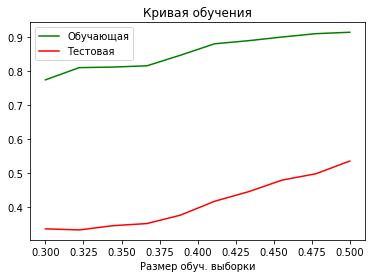

In [21]:
size = np.linspace(0.3,0.5,10)
train_size, train_scores, validation_scores = learning_curve(svcgay, x_train, y_train, train_sizes = size)
train_scores = train_scores.mean(axis = 1)
validation_scores = validation_scores.mean(axis = 1)
plt.figure()
plt.plot(size, train_scores, color = 'green',  label='Обучающая')
plt.plot(size, validation_scores, color = 'red', label='Тестовая')
plt.title('Кривая обучения')
plt.xlabel('Размер обуч. выборки')
plt.legend()
plt.show()

In [22]:
%%time
svcgay.fit(x_train, y_train)

Wall time: 209 ms


SVC()

#### метод опорных векторов с полиномиальным ядром (SVC)

In [23]:
svcpoly2 = SVC(kernel = 'poly', degree = 2)
svcpoly2.fit(x_train, y_train)
y_pred = svcpoly2.predict(x_test)

In [24]:
print('Метрика достоверности предсказания:', metrics.accuracy_score(y_test, y_pred))
print('Метрика точности:', metrics.precision_score(y_test, y_pred, average = 'micro'))
print('Метрика полноты:', metrics.recall_score(y_test, y_pred, average = 'micro'))

Метрика достоверности предсказания: 0.9375
Метрика точности: 0.9375
Метрика полноты: 0.9375


C:\Users\sanha\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


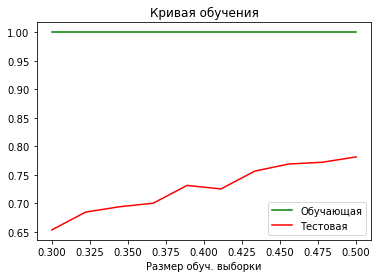

In [25]:
size = np.linspace(0.3,0.5,10)
train_size, train_scores, validation_scores = learning_curve(svcpoly2, x_train, y_train, train_sizes = size)
train_scores = train_scores.mean(axis = 1)
validation_scores = validation_scores.mean(axis = 1)
plt.figure()
plt.plot(size, train_scores, color = 'green',  label='Обучающая')
plt.plot(size, validation_scores, color = 'red', label='Тестовая')
plt.title('Кривая обучения')
plt.xlabel('Размер обуч. выборки')
plt.legend()
plt.show()

In [26]:
%%time
svcpoly2.fit(x_train, y_train)

Wall time: 166 ms


SVC(degree=2, kernel='poly')

#### метод k ближайших соседей (KNeighborsClassifier)

In [28]:
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [29]:
print('Метрика достоверности предсказания:', metrics.accuracy_score(y_test, y_pred))
print('Метрика точности:', metrics.precision_score(y_test, y_pred, average = 'micro'))
print('Метрика полноты:', metrics.recall_score(y_test, y_pred, average = 'micro'))

Метрика достоверности предсказания: 0.875
Метрика точности: 0.875
Метрика полноты: 0.875


C:\Users\sanha\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


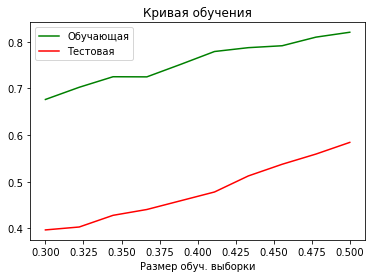

In [30]:
size = np.linspace(0.3,0.5,10)
train_size, train_scores, validation_scores = learning_curve(classifier, x_train, y_train, train_sizes = size)
train_scores = train_scores.mean(axis = 1)
validation_scores = validation_scores.mean(axis = 1)
plt.figure()
plt.plot(size, train_scores, color = 'green',  label='Обучающая')
plt.plot(size, validation_scores, color = 'red', label='Тестовая')
plt.title('Кривая обучения')
plt.xlabel('Размер обуч. выборки')
plt.legend()
plt.show()

In [31]:
%%time
classifier.fit(x_train, y_train)

Wall time: 1 ms


KNeighborsClassifier(n_neighbors=3)

#### многослойный перцептрон (MLP)

In [32]:
clmlp = MLPClassifier(random_state = 1, max_iter = 3000)
clmlp.fit(x_train, y_train)
y_pred = clmlp.predict(x_test)

In [33]:
print('Метрика достоверности предсказания:', metrics.accuracy_score(y_test, y_pred))
print('Метрика точности:', metrics.precision_score(y_test, y_pred, average = 'micro'))
print('Метрика полноты:', metrics.recall_score(y_test, y_pred, average = 'micro'))

Метрика достоверности предсказания: 0.875
Метрика точности: 0.875
Метрика полноты: 0.875


C:\Users\sanha\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


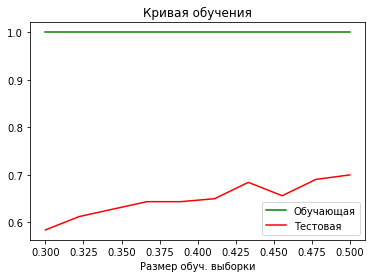

In [34]:
size = np.linspace(0.3,0.5,10)
train_size, train_scores, validation_scores = learning_curve(clmlp, x_train, y_train, train_sizes = size)
train_scores = train_scores.mean(axis = 1)
validation_scores = validation_scores.mean(axis = 1)
plt.figure()
plt.plot(size, train_scores, color = 'green',  label='Обучающая')
plt.plot(size, validation_scores, color = 'red', label='Тестовая')
plt.title('Кривая обучения')
plt.xlabel('Размер обуч. выборки')
plt.legend()
plt.show()

In [35]:
%%time
clmlp.fit(x_train, y_train)

Wall time: 11.2 s


MLPClassifier(max_iter=3000, random_state=1)